<a href="https://colab.research.google.com/github/manaswini0707/Modules/blob/main/M_1_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 4 October 2021 Monday <br>



In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import numpy as np
import plotly.express as px
import pandas as pd

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=a89c173dc5aff1b9b0ce602997c8edb53048d6acf75905e81a4edcc37c92274e
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


Now we are here mountng the contnt on google drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features. 

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'
# In the below coade ('en') is for english
wikipedia.set_lang('en')
# creting varbles to store wikipedia page topic content 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
# In the below coade ('fr') is for french
wikipedia.set_lang('fr')
# creting varbles to store wikipedia page topic content
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [ ]:
# creting varbles to store wikipedia page topic content
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'Éléphant de savane d\'Afrique et l\'Éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« Éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'Éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας signifiant « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

In [ ]:
eng1

'The giraffe (Giraffa) is an African artiodactyl mammal, the tallest living terrestrial animal and the largest ruminant.  It is traditionally considered to be one species, Giraffa camelopardalis, with nine subspecies. However, the existence of up to nine extant giraffe species has been described, based upon research into the mitochondrial and nuclear DNA, as well as morphological measurements of Giraffa. Seven other prehistoric species, known from fossils, are extinct.\nThe giraffe\'s chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its distinctive coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Their food source is leaves, fruits and flowers of woody plants, primarily acacia species, which

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffegiraffaisanafricanartiodactylmammalthetallestlivingterrestrialanimalandthelargestruminantitistraditionallyconsideredtobeonespeciesgiraffacamelopardaliswithninesubspecieshowevertheexistenceofuptonineextantgiraffespecieshasbeendescribedbaseduponresearchintothemitochondrialandnucleardnaaswellasmorphologicalmeasurementsofgiraffasevenotherprehistoricspeciesknownfromfossilsareextinctthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsdistinctivecoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesandtheiroffspringorbachelorherdsof

In [ ]:
print(fr2)

leslphantssontdesmammifresproboscidiensdelafamilledeslphantidsilscorrespondentaujourdhuitroisespcesrpartiesendeuxgenresdistinctsllphantdesavanedafriqueetllphantdefortdafriqueautrefoisregroupssouslammeespcedlphantdafriqueappartiennentaugenreloxodontatandisquellphantdasieanciennementappellphantindienappartientaugenreelephasilssediffrencientparcertainescaractristiquesanatomiquesleslphantsdasietantengnralpluspetitsavecdesoreillespluspetitesouencoreunediffrenceduboutdelatrompecesespcessurvivantesfontlocalementlobjetdeprogrammesoudeprojetsderintroductionetdeprotectionlemotfranaislphantvientdumotlatinelephantusquitiresonoriginedugrecsignifiantivoireoulphantllphantapparaitdansdenombreusesculturesilestsymboledesagessedanslacultureasiatiqueconnupoursammoireetsonintelligencequiestcomparecelledesctacsethominidsaristoteavaitditquellphantestlabtequidpassetouteslesautresparlintelligenceetlespritdescriptionllphantdafriquequipeutatteindretonnesestleplusgrosanimalterrestreactuelmaisilestloinderrirelabal

Now let us calculate the frequency of the character n-grams. 

**N-grams** are groups of characters of size n. 
A **unigram** is a single character and a **bigram** is a group of two characters and so on. 

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

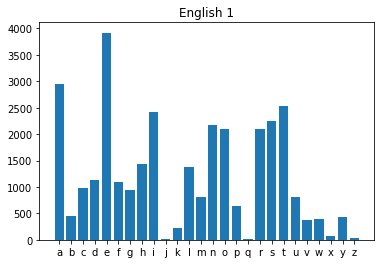

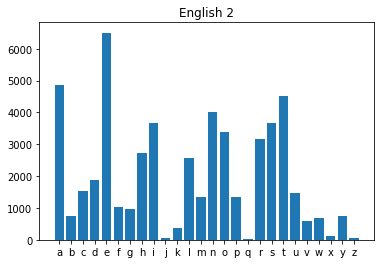

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

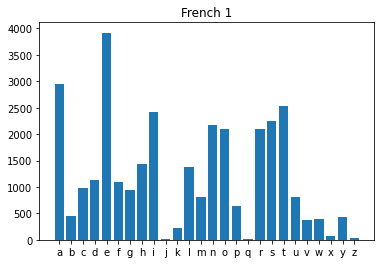

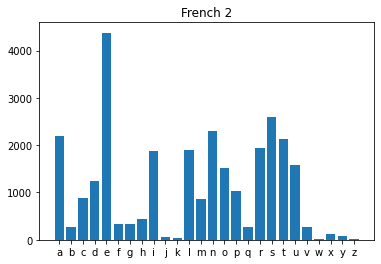

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at **bigrams**.

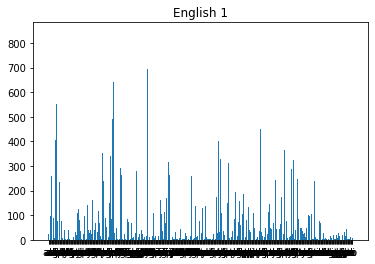

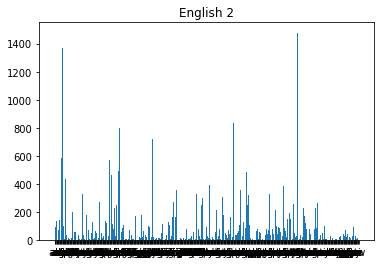

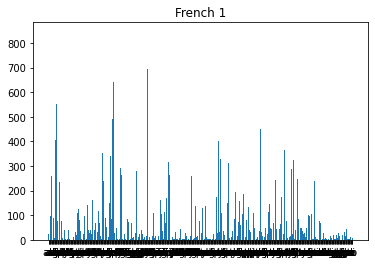

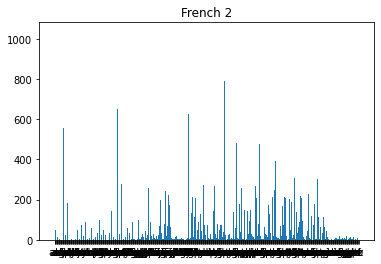

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to **visualize bigrams** is to use a **2-dimensional graph**.

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

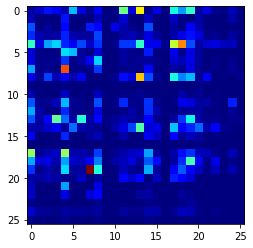

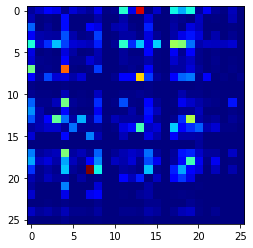

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

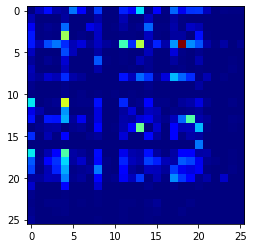

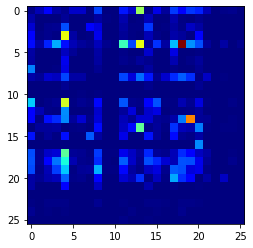

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the **top 10 ngrams** for each text. 

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 695.0
('e', 's') : 643.0
('i', 'n') : 592.0
('a', 'n') : 551.0
('e', 'r') : 493.0
('r', 'e') : 450.0
('r', 'a') : 445.0
('a', 'l') : 406.0
('n', 'd') : 401.0

English 2:
('t', 'h') : 1478.0
('a', 'n') : 1368.0
('h', 'e') : 1189.0
('i', 'n') : 1014.0
('n', 't') : 833.0
('e', 'r') : 800.0
('e', 's') : 752.0
('r', 'e') : 750.0
('l', 'e') : 724.0
('h', 'a') : 716.0

French 1:
('e', 's') : 645.0
('l', 'e') : 394.0
('e', 'n') : 367.0
('d', 'e') : 349.0
('o', 'n') : 309.0
('n', 't') : 289.0
('r', 'e') : 289.0
('e', 'l') : 276.0
('r', 'a') : 230.0
('l', 'a') : 228.0

French 2:
('e', 's') : 1031.0
('n', 't') : 792.0
('d', 'e') : 656.0
('e', 'n') : 649.0
('l', 'e') : 625.0
('a', 'n') : 555.0
('o', 'n') : 481.0
('r', 'e') : 477.0
('e', 'l') : 438.0
('s', 'e') : 392.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics. 

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


**A few ways to explore:**

**1.** Try with different languages.

**2.** The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?

**3.** How can we use and visualize trigrams and higher n-grams?

In [ ]:
topic1 = 'Sushi'
topic2 = 'Russia'
# In the below coade ('en') is for english
wikipedia.set_lang('en')
# creting varbles to store wikipedia page topic content 
e1 = wikipedia.page(topic1).content
e2 = wikipedia.page(topic2).content
# In the below coade ('es') is for spanish
wikipedia.set_lang('es')
# creting varbles to store wikipedia page topic content 
es1 = wikipedia.page(topic1).content
es2 = wikipedia.page(topic2).content
# In the below coade ('fr') is for french
wikipedia.set_lang('fr')
# creting varbles to store wikipedia page topic content
f1 = wikipedia.page(topic1).content
f2 = wikipedia.page(topic2).content
# In the below coade ('hi') is for hindi
wikipedia.set_lang('hi')
# creting varbles to store wikipedia page topic content
hi1 = wikipedia.page(topic1).content
hi2 = wikipedia.page(topic2).content

In [ ]:
hi1

'सुशि (जापानी: すし, 寿司, 鮨, 鮓 pronounced [sɯꜜɕi]) एक पारम्परिक जापानी व्यंजन है जिसमें सिरके वाले चावल (जापानी: 鮨飯) तैयार किए जाते हैं, आमतौर पर कुछ चीनी और नमक के साथ, विभिन्न प्रकार की सामग्री के साथ  (ネタ, नेता), जैसे समुद्री भोजन, अक्सर कच्चा, और सब्जियाँ।  सुशि की शैलियाँ और इसकी प्रस्तुति व्यापक रूप से भिन्न होती है, लेकिन एक प्रमुख घटक "सुशि चावल" है, जिसे शारि (しゃり), या सुमेशि (酢飯) भी कहा जाता है। \n\n\n== सामग्री ==\nविनेगर चावल (जो कि शरी और सुमेशी के नाम से भी जाना जाता है)\nसषीमी (कटी हुई मछली (या कभी कभी मांस) जो कि चावल के बिना परोसी जाती है)\n\n\n= इतिहास =\n\nमूल प्रकार की सूशी जो कि आजकल नरे ज़ूशी के नाम से केहते है, पहले दक्षिण पूर्व एशिया में बनाई गई थी, संभवतः अब मेकांग नदी के समीप। अवधी सूशी एक पुराने व्याकरण फार्म जो अब कोई उपयोग नही करता। वस्तुतः सूशी का अर्थ है "खट्टा स्वाद", अपनी ऐतिहासिक किण्वित जड़ों का एक प्रतिबिंब।\nसूशी, अंतरराष्ट्रीय स्तर पर, Hanaya Yohei (1799–1858) की वजह से "ऐदो"अवधि के अन्त मे प्रसिध हुई। हनाया के द्वारा सूशी का आविशकार एक फास्ट फूड का प

In [ ]:
f2

'La Russie (en russe : Россия, Rossiïa ), en forme longue fédération de Russie (en russe : Российская Федерация, Rossiïskaïa Federatsiïa ), est un État fédéral transcontinental, le plus vaste État de la planète, à cheval sur l\'Asie du Nord (75 % de sa superficie) et sur l\'Europe (25 %). \nD\'ouest en est, son territoire s\'étend de la mer Baltique (exclave de Kaliningrad) au détroit de Behring (district autonome de Tchoukotka) sur plus de 6 600 kilomètres, avec une superficie de 17 125 191 km2, soit 11,5 % des terres émergées. \nLimitrophe de l\'Océan Arctique au nord, la Russie est caractérisée par un climat continental avec des hivers particulièrement froids et hostiles sur une grande partie du territoire, notamment en Sibérie, à l\'est de l\'Oural. \nLa population russe est estimée à près de 147 millions d\'habitants en 2019, ce qui en fait le neuvième pays le plus peuplé de la planète. 78 % de ses habitants vivent en Europe.\nAprès la chute de la Rus\' de Kiev au XIIIe siècle, la

In [ ]:
e1

'Su Shi (traditional Chinese: 蘇軾; simplified Chinese: 苏轼; 8 January 1037 – 24 August 1101), courtesy name Zizhan (Chinese: 子瞻), art name Dongpo (Chinese: 東坡), was a Chinese poet, writer, politician, calligrapher, painter, pharmacologist, and gastronome of the Song dynasty. A major personality of the Song era, Su was an important figure in Song Dynasty politics, aligning himself with Sima Guang and others, against the New Policy party led by Wang Anshi.\nSu Shi is widely regarded as one of the most accomplished figures in classical Chinese literature, having produced some of the most well-known poems, lyrics, prose, and essays. Su Shi was famed as an essayist, and his prose writings lucidly contribute to the understanding of topics such as 11th-century Chinese travel literature or detailed information on the contemporary Chinese iron industry. His poetry has a long history of popularity and influence in China, Japan, and other areas in the near vicinity and is well known in the English-

In [ ]:
es2

'Rusia (en ruso, Россия, romanización Rossíya),[n. 1]\u200b conocida formalmente[n. 2]\u200b como Federación de Rusia[n. 1]\u200b (en ruso, Российская Федерация, romanización Rossíyskaya Federátsiya) y citada de manera extraoficial en ocasiones como Federación Rusa, es el país más extenso del mundo. La Federación de Rusia cuenta con una superficie de 17 098 242 km²,[4]\u200b equivalente a la novena parte de la tierra firme del planeta, y con gran variedad de relieve y de ecosistemas. Su capital es la ciudad federal de Moscú.\nLa forma de gobierno es la república semiparlamentaria formada por ochenta y cinco sujetos federales,  y es el noveno país con mayor población en el mundo al tener 146 904 396 habitantes.[12]\u200b Ocupa toda Asia del Norte y alrededor del 40 % de Europa (principalmente Europa del Este),[n. 3]\u200b por lo que es un país transcontinental. En Rusia existen once zonas horarias, desde UTC+2 hasta UTC+12.[n. 4]\u200b Rusia tiene las mayores reservas de recursos energé

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
e1 = cleanup(e1)
e2 = cleanup(e2)
f1 = cleanup(f1)
f2 = cleanup(f2)
es1 = cleanup(es1)
es2 = cleanup(es2)

In [ ]:
print(e1)

sushitraditionalchinesesimplifiedchinesejanuaryaugustcourtesynamezizhanchineseartnamedongpochinesewasachinesepoetwriterpoliticiancalligrapherpainterpharmacologistandgastronomeofthesongdynastyamajorpersonalityofthesongerasuwasanimportantfigureinsongdynastypoliticsaligninghimselfwithsimaguangandothersagainstthenewpolicypartyledbywanganshisushiiswidelyregardedasoneofthemostaccomplishedfiguresinclassicalchineseliteraturehavingproducedsomeofthemostwellknownpoemslyricsproseandessayssushiwasfamedasanessayistandhisprosewritingslucidlycontributetotheunderstandingoftopicssuchasthcenturychinesetravelliteratureordetailedinformationonthecontemporarychineseironindustryhispoetryhasalonghistoryofpopularityandinfluenceinchinajapanandotherareasinthenearvicinityandiswellknownintheenglishspeakingpartsoftheworldthroughthetranslationsbyarthurwaleyamongothersintermsoftheartssushihassomeclaimtobeingthepreeminentpersonalityoftheeleventhcenturydongpoporkaprominentdishinhangzhoucuisineisnamedinhishonorlifesushiw

In [ ]:
print(es1)

sushiosushiesunplatotpicodeorigenjaponsbasadoenarrozaderezadoconvinagredearrozazcarysalycombinadoconotrosingredientescomopescadoscrudosmariscosverdurasetcesteplatoesunodelosmsreconocidosdelagastronomajaponesayunodelosmspopularesinternacionalmenteaunquenormalmenteseasociaelsushiconelpescadoyelmariscotambinpuedellevarverdurasohuevooinclusocualquierotroacompaanteademslosproductosfrescostradicionalesqueacompaanalarroznotienenqueirsiemprecrudosseincluyentambinpreparacionesasadashervidasfritasomarinadasesdecirqueelnombresushiserefierealapreparacindelarrozyqueelacompaamientosibienesrelevanteenelsabornohacealplatoensaunqueexisteunavariedaddeacompaamientosdesushiinternacionalmentereconocidosyacostumbradosloidealesquecadareginadopteacompaamientostpicosdellugarconpescadosofrutosdelareginqueestnidentificadosconelgustoylagastronomalocalsinembargodebeabstenersedelusodepescadodeaguasaladasincongelarpreviamentedadoquepuedeconteneranisakisaexcepcindelsalmndeacuiculturaelsushisepreparageneralmenteenraci

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

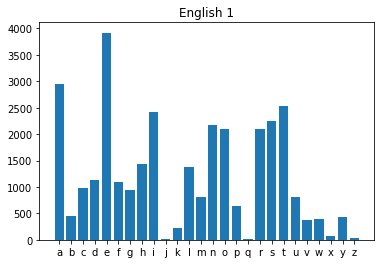

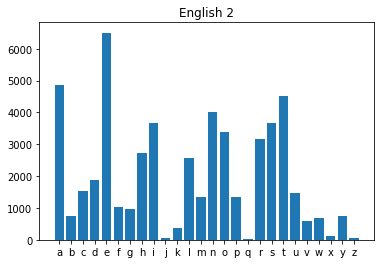

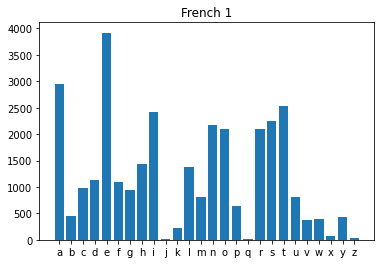

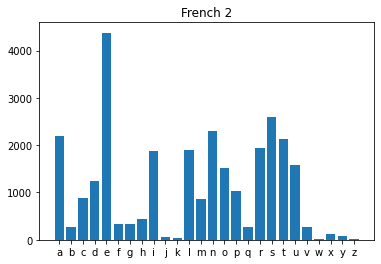

In [ ]:
# Unigrame
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()

unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()

unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

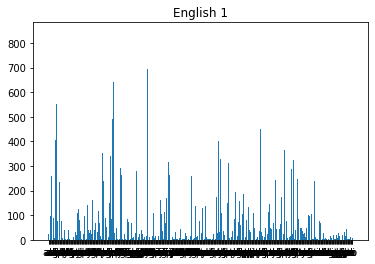

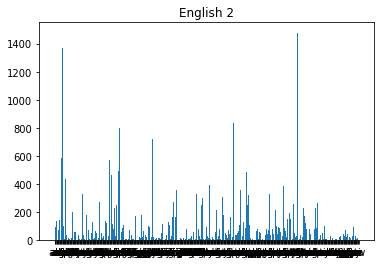

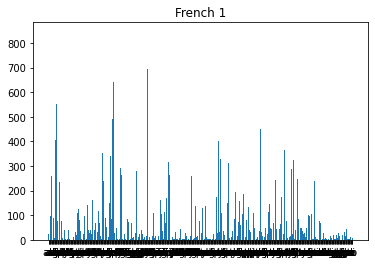

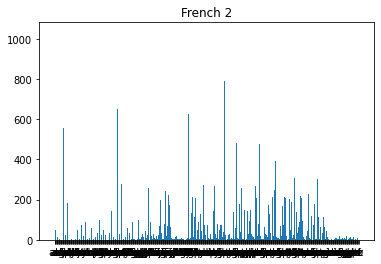

In [ ]:
# Bigrame
bigram_eng1 = Counter(ngrams(eng1,2)) 
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

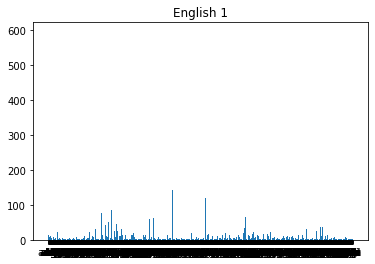

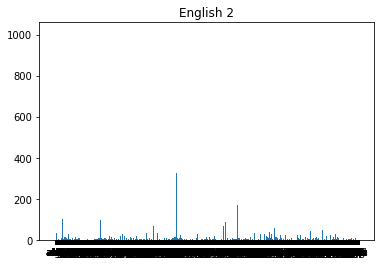

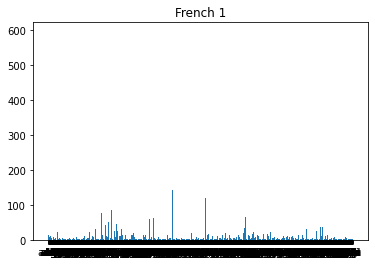

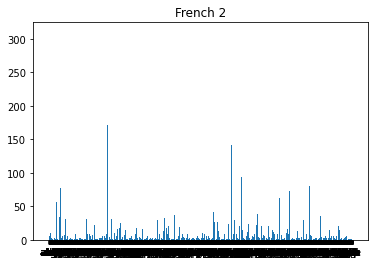

In [ ]:
# Trigrame
trigram_eng1 = Counter(ngrams(eng1,3))
plothistogram(trigram_eng1)
plt.title('English 1')
plt.show()

trigram_eng2 = Counter(ngrams(eng2,3))
plothistogram(trigram_eng2)
plt.title('English 2')
plt.show()

trigram_fr1 = Counter(ngrams(fr1,3))
plothistogram(trigram_eng1)
plt.title('French 1')
plt.show()

trigram_fr2 = Counter(ngrams(fr2,3))
plothistogram(trigram_fr2)
plt.title('French 2')
plt.show()

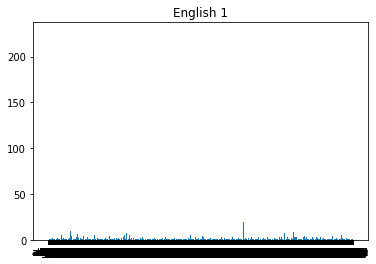

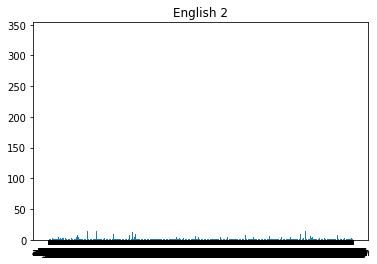

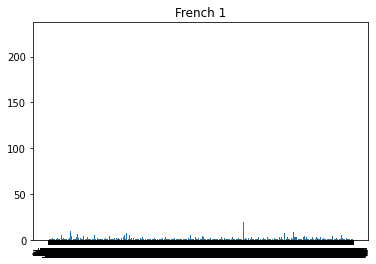

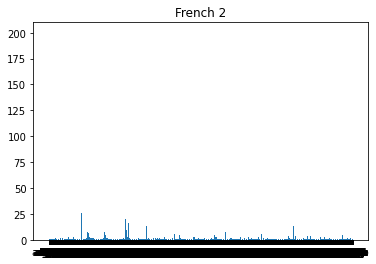

In [ ]:
# 5 - gram

gram_eng1 = Counter(ngrams(eng1,5))
plothistogram(gram_eng1)
plt.title('English 1')
plt.show()

gram_eng2 = Counter(ngrams(eng2,5))
plothistogram(gram_eng2)
plt.title('English 2')
plt.show()

gram_fr1 = Counter(ngrams(fr1,5))
plothistogram(gram_eng1)
plt.title('French 1')
plt.show()

gram_fr2 = Counter(ngrams(fr2,5))
plothistogram(gram_fr2)
plt.title('French 2')
plt.show()

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

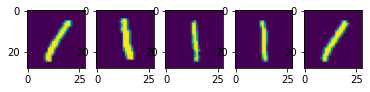

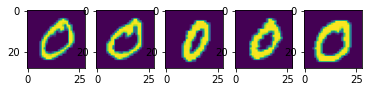

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

Now, let us start with a simple feature: 

The **sum of all pixels** and see how good this feature is:

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

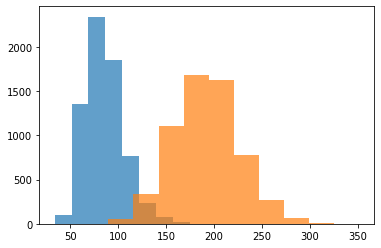

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. 

We will count the number black pixels that are surrounded on four sides 
by non-black pixels, or **"hole pixels"**.


In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

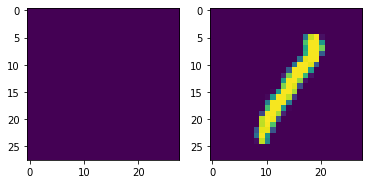

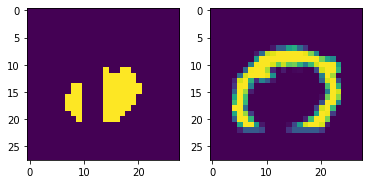

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

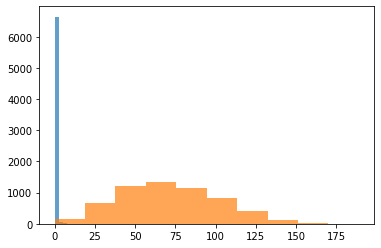

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or **the number with the holes filled in**:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull


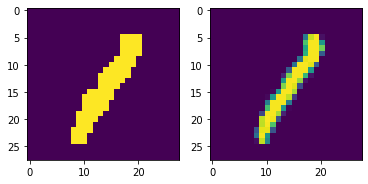

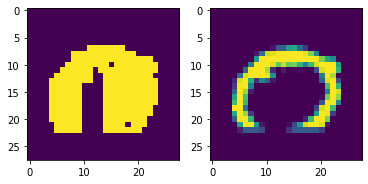

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

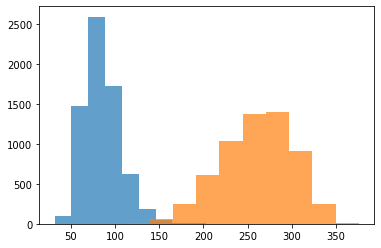

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of **boundary pixels in each image**.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

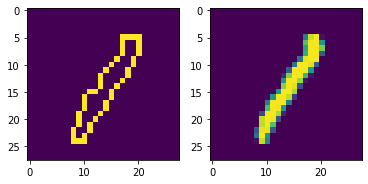

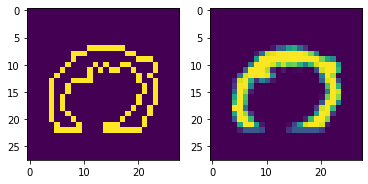

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

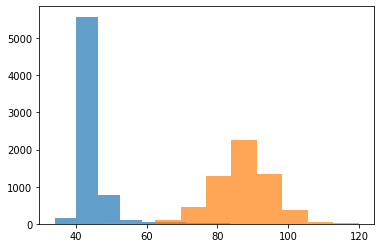

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together? 

We can visualise better.

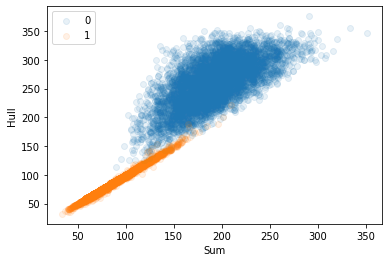

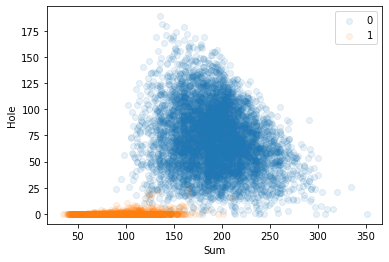

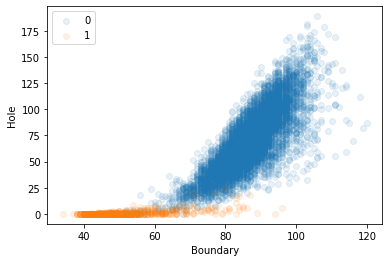

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)), 
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


**Some questions to explore:** 

**1.** Which is the best combination of features?

**2.** How would you test or visualize four or more features?

**3.** Can you come up with your own features?

**4.** Will these features work for different classes other than 0 and 1?

**5.** What will happen if we take more that two classes at a time?

**Ans1** I feel **hole and sum** feature works best to distinguish between 1 and 0.

**Ans2** We can directly test or visualize four or more features. As 4 features doesn't mean 4-D, each of them have l,b,h which can be plotted on histogram.

**Ans4** These features will work but they wont be easily seprated when we visualise as there is a grater area of overlap between the two.

**Some problem:**

* If we use **hole**, not all the numbers other than 0 and 1 are compitable we may fase problem in 6 and 9 example.

* If we use **hole**, not all the numbers other than 0 and 1 are compitable we may fase problem in 4 and 9 example.

Below are the coade for the same.

FOR **SUM**

In [ ]:
no1 = train_X[train_y==2,:,:]
no0 = train_X[train_y==4,:,:]

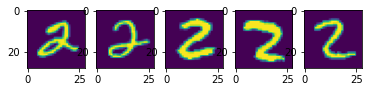

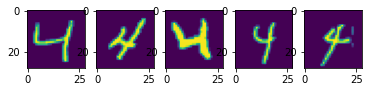

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

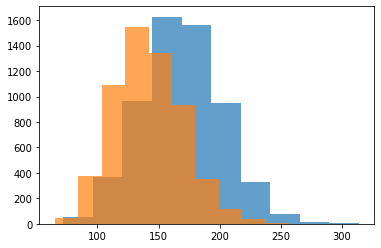

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

FOR **BOUNDARY**

In [ ]:
no1 = train_X[train_y==7,:,:]
no0 = train_X[train_y==4,:,:]

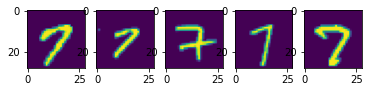

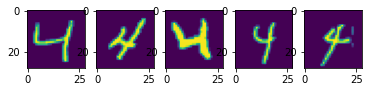

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

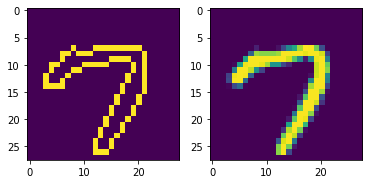

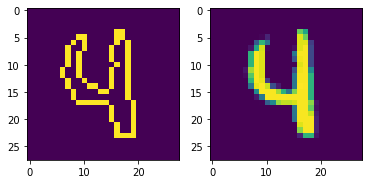

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

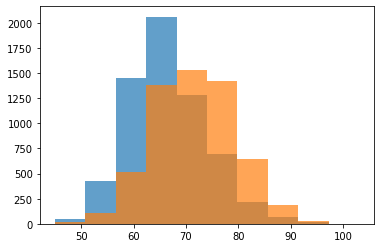

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

FOR **HOLE**

In [ ]:
no1 = train_X[train_y==6,:,:]
no0 = train_X[train_y==9,:,:]

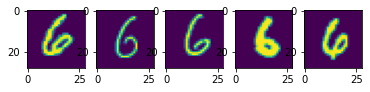

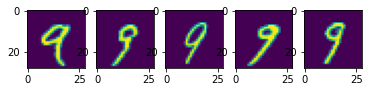

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

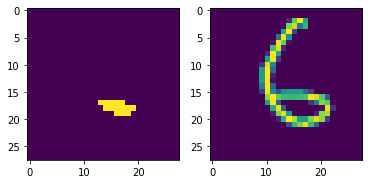

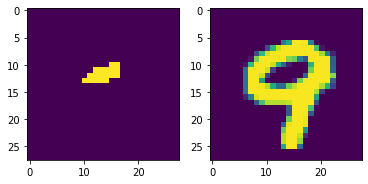

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

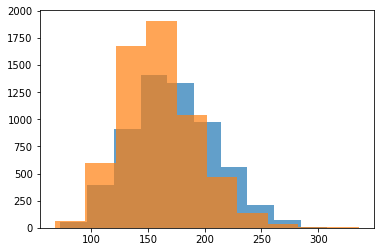

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

FOR **HULL**

In [ ]:
no1 = train_X[train_y==4,:,:]
no0 = train_X[train_y==9,:,:]

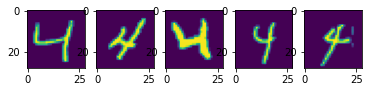

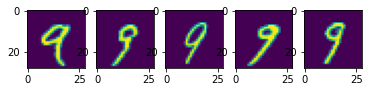

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull


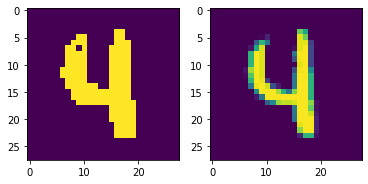

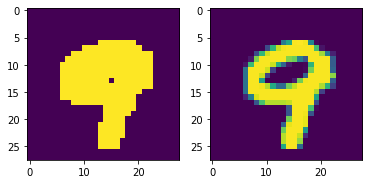

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

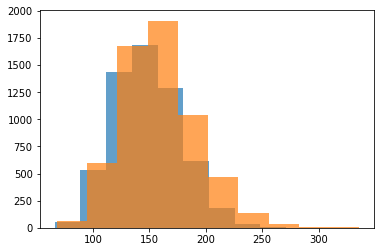

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

**Ans5** As we can see **color='Class'**. So, if we add more classes we will get more colores other than BLUE = 1 and RED = 0.